# 숫자 손글씨 분류하기

- 출처 : http://yann.lecun.com/exdb/mnist/

#### 문제 정의
28x28 픽셀의 손글씨 숫자 이미지를 입력받아 실제로 의미하는 숫자를 인식한다.

#### 가설 수립
28x28 픽셀 데이터, 즉 784종의 특징 데이터를 구성한 후 머신러닝을 통해 실제로 어떤 숫자인지 추측할 수 있다.

#### 목표
28x28 사이즈의 숫자 손글씨 이미지로 부터 label값을 얻어낸다.

#### 데이터 구성
- 784개 입력 데이터 : 28x28 픽셀이므로 총 784칸의 픽셀 값 정보
- 출력 데이터 : label(어떤 숫자인가?)
- 개수 : 10,000개

#### 분석 가이드
1. 문제를 이해합니다.  이미지의 각 픽셀을 특징 데이터로 취급하여 어떤 숫자인지 인식하는 문제입니다.
2. EDA 및 Feature Engineering을 실시합니다.  어떤 식으로 이미지의 픽셀을 특징 데이터로 구성하였는지 파악합니다.
3. 가설 검증 계획을 수립합니다.  classfication을 다루는 머신러닝 모델링
4. 데이터셋을 구성합니다.  상황과 목적에 따라 적절한 train set, (validation set), test set을 구성합니다.
5. 모델링하고 학습합니다.  DecisionTreeClassifier, RandomForestClassifier, …
6. 모델을 평가하고 검증합니다.
7. 최종 결론을 도출합니다.  000모델을 통해 000의 정확도로 숫자 손글씨를 OCR할 수 있다.

#### 코딩 시나리오
1. 데이터를 불러옵니다.
2. EDA 및 Feature Engineering을 실시합니다.
3. 데이터셋을 구성합니다.
4. 모델링하고 학습합니다.
5. 모델을 평가하고 검증합니다.
6. 최종 결론을 도출합니다.

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('data/digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


## 2. EDA & Feature Engineering

#### 일반적으로 OCR 문제에서 고려할만한 요소들
1. **이미지를 모두 흑백으로 바꾸기** : 이미지가 컬러든 흑백이든 인식률은 거의 차이가 없습니다. 머신러닝을 용이하게 할 수 있도록 흑백으로 바꿔줍니다.
2. **이미지 사이즈를 28 x 28로 조정하기** : 이미지 사이즈가 28x28이 아닐 경우 모델이 작동하지 않습니다. 따라서 입력되는 모든 데이터의 이미지가 균일한 크기가 되도록 조정해줍니다.
3. 준비된 이미지 데이터는 이미 위 요소들이 고려되어 있습니다.

#### EDA & Feature Engineering 최소 요구사항
1. 픽셀 특징이 가지고 있는 최솟값, 최댓값 파악하기
2. label(숫자 종류: 0~9)별로 몇개의 데이터가 있는지 시각화하기
3. 이미지 살펴보기

In [3]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10",...,"pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.988281,0.988281,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,9.000000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

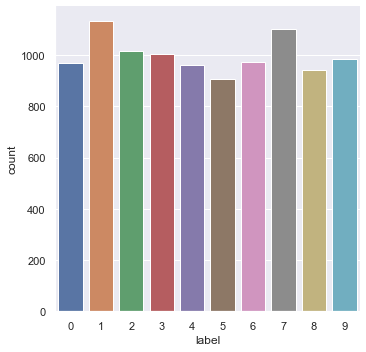

In [5]:
sns.catplot(data=df, x='label', kind='count')

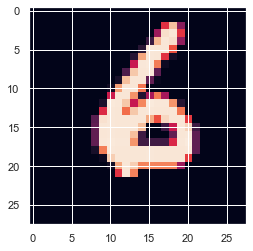

In [6]:
numbers=df.drop(['label'],axis=1)
nth=9999
img=np.reshape(numbers.iloc[nth].values,[28,28])
plt.imshow(img)
plt.show()

## 3. Dataset 구성하기

In [7]:
input_data=df.drop('label', axis=1)
target_data=df['label']
print(input_data.shape, target_data.shape)

(10000, 784) (10000,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)
print(input_data.shape, x_train.shape, x_test.shape)

(10000, 784) (8000, 784) (2000, 784)


## 4. 모델링과 학습 & 모델 검증
1. **분류 문제인지 회귀 문제인지 구분합니다.** : 이 문제는 분류 문제입니다.  분석의 결과로 총 10가지 카테고리(0, 1, 2, 3, 4, 5, 6, 7, 8, 9 숫자)가 예측되는 분류(Classification) 문제입니다.
2. **분류에 효과적인 모델을 찾아봅니다.** : 타이타닉 문제, 아이리스 문제가 바로 분류 문제였습니다.  우리는 위 상황에서 DecisionTreeClassifier, RandomForestClassifier 모델을 사용하여 문제를 해결하였습니다.
3. **학습에 사용할 모델을 선택합니다.** : 학습시간이 짧으므로 최대한 많은 모델들을 실험해보는게 좋습니다.
3. **학습을 진행합니다.**
4. **모델의 score를 구합니다.**
5. **test set을 이용하여 선택한 모델의 최종 성능을 평가합니다.**

In [9]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)
print('train accuracy:', tree.score(x_train, y_train))
print('test accuracy:', tree.score(x_test, y_test))

train accuracy: 1.0
test accuracy: 0.8


In [10]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100) 
forest.fit(x_train, y_train)
print('train accuracy:', forest.score(x_train, y_train))
print('test accuracy:', forest.score(x_test, y_test))

train accuracy: 1.0
test accuracy: 0.9435


#### 실제 예측 결과물 살펴보기

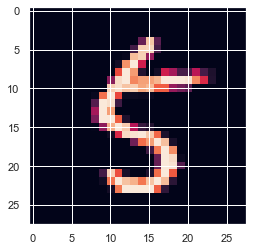

인식된 숫자는 5 입니다.


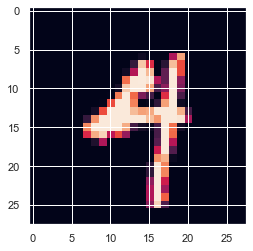

인식된 숫자는 4 입니다.


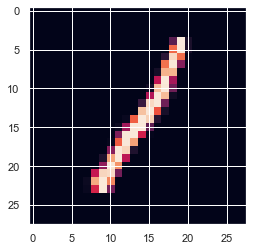

인식된 숫자는 1 입니다.


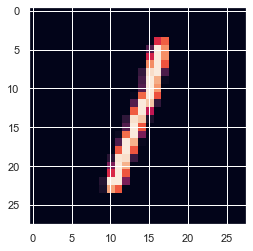

인식된 숫자는 1 입니다.


In [11]:
#random으로 픽하기
import random
for i in range(4):
    n=random.randrange(0, len(x_test))
    img=np.reshape(x_test.iloc[n].values,[28,28])
    plt.imshow(img)
    plt.show()
    result=forest.predict([x_test.iloc[n].values])[0]
    print('인식된 숫자는', result, '입니다.')

## cf. Support Vector Machine 사용해보기
SVM(Support Vecotr Machine)은 Decision Tree, Random Forest와 같이 인기 있는 모델입니다. 사용하기 쉬우면서도 꽤 좋은 성능이 보장되기 때문에 실제로 굉장히 많은 분야에서 쓰이고 있습니다.

In [12]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)

print('train accuracy:', model.score(x_train, y_train))
print('test accuracy:', model.score(x_test, y_test))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy: 0.923375
test accuracy: 0.916
